<img alt="Banner" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/LuisCSGuimaraes/main/Banner.png">


*Um projeto inspirado por:*

<img alt="Sigmoidal logo" width="10%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

**Data Science na Prática**
*by [sigmoidal.ai](https://sigmoidal.ai)*


# Churn Prediction

Em uma definição generalista, *churn* é uma métrica que indica  o **número de clientes que cancelam** um serviço em um determinado período de tempo.

A taxa de *churn* tem um efeito negativo na receita de uma empresa, por isso, entender o que é esse indicador e como trabalhar para midigar essa métrica é algo crítico para o sucesso de muitos negócios, já que entender por que seus clientes abandonam seu produto ou serviço é vital para conquistar um **crescimento sustentável**.

Hoje, especialmente com o crescimento de modelos de negócios por assinatura, o modelo *SaaS*, o Churn (ou **índice de cancelamento de clientes**) passou a ser mais conhecido (*Adaptado de [Resultados Digitais](https://resultadosdigitais.com.br/marketing/o-que-e-churn/)*).

<img alt="Churn_Body" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/ChurnPrediction/main/Images/churn_body.jpg">

Perder um cliente não significa apenas deixar de ganhar o valor de contrato, mas também todas as eventuais oportunidades de negócios e indicações para terceiros, com o chamado “Marketing boca a boca”, que poderiam surgir.

Além disso, uma receita a menos com a mesma infraestrutura significa, de modo geral, o **aumento dos custos fixos** relacionados para os demais contratantes e, consequentemente, a diminuição dos lucros provenientes ([Fonte](https://www.cortex-intelligence.com/blog/vendas/como-calcular-churn-de-clientes)).

Isso mostra que essa é uma métrica de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado, além disso, devemos nos ater ao fato de que o **Custo de Aquisição de Cliente (CAC)** é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

Churn também pode ser usado para identificar potenciais cancelamentos, com um **tempo de antecedência**. Este pprojeto utilizará dados anônimos de uma empresa de telecomunicações para desenvolver um modelo de *machine learning* que busca prever com uma alta acertividade a **probabilidade de cancelamento** de determinado cliente, com isso a empresa em questão poderia promover ações direcionadas para tentar reter tais clientes, diminuindo assim o *churn rate*. 

## Índice
- Fonte o obtenção dos dados
- Análise inicial
- Dicionário de variáveis
- Análise exploratória

## Fonte e obtenção dos dados

Os dados desse projeto foram disponibilizados originalmente na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#) e hoje estão disponíveis no [GitHub da empresa](https://github.com/IBM/telco-customer-churn-on-icp4d). 

Para evitar perdas caso o arquivo seja retirado do ar por qualquer motivo e possibilitar a replicabilidade do projeto, realizei uma cópia do *dataset* original e disponibilizei em meu GitHub. O arquivo pode ser acessado [aqui](https://raw.githubusercontent.com/LuisCSGuimaraes/ChurnPrediction/main/RawData/Telco-Customer-Churn.csv).

In [1]:
#Definindo a seed para a replicabilidade do projeto
seed = 190821

#Atribuindo o valor da seed à variável de ambiente `PYTHONHASHSEED`
import os
os.environ['PYTHONHASHSEED']=str(seed)

#Atribuindo o valor da seed ao `python` built-in pseudo-random generator
import random
random.seed(seed)

#Atribuindo o valor da seed ao `numpy` pseudo-random generator
import numpy as np
np.random.seed(seed)

In [2]:
#Importando as bicliotecas para a fase inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importar os dados
DATA_PATH = "https://raw.githubusercontent.com/LuisCSGuimaraes/ChurnPrediction/main/RawData/Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

#Configurando o estilo gráfico dos plots 
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = "11"
plt.rcParams["text.color"] = "#515151"
cinza_texto="#515151"
sns.set_style("white")

#Exibindo a estrutura do dataframe e os valores iniciais
print("### Estrutura do dataframe ###\n")
print("Linhas:             ",df.shape[0])
print("Colunas (features): ",df.shape[1])
print("\n------------------------------\n")

df.head()



### Estrutura do dataframe ###

Linhas:              7043
Colunas (features):  21

------------------------------



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Vemos que a maior parte dos dados do *dataframe* são **categóricos** e existem poucos dados numéricos, isso significa que precisaremos realizar um processo de *encoding* de modo que o modelo consiga utilizar esses dados para realizar as previsões. Percebemos, também, que a variável `customerID` provalmente nos dá a **identificação única** de cada cliente. Se esse for o caso essa variável pode ser ignorada em nosso modelo.



## Análise inicial

Vejamos mais algumas informações a respeito dos dados que estamos trabalhando antes de passarmos para a etapa de construção do dicionário de variáveis.

In [3]:
#Exibindo informações de valores nulos e dos tipos de dados
print("### Exibindo informações do dataframe ###\n")
df.info()
print("\n---------------------------------------\n")
print("### Exibindo os valores únicos de cada coluna ###\n")
df.nunique()

### Exibindo informações do dataframe ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Conseguimos retirar mais algumas informações iniciais importantes a respeito dos dados:
- A variável `customerID` é única para cada linha do *dataframe*, isso significa que ela representa um valor de identificação único para cada cliente, como suspeitávamos. Logo, não precisamos utilizá-la;
- A maior parte das variáveis é categórica e assumem poucos valores, como já mencionado;
- Nossa variável alvo é a variável `churn`, que indica se houve ou não cancelamento por parte daquele cliente. Ela será utilizada pelo modelo para entender e prever qual a probabilidade de cancelamento que um novo determinado cliente possuí;
- Aparentemente não possuímos valores ausentes;
- Observando os dados da variável `TotalCharges` percebemos que eles não condizem com o seu tipo. Temos dados numéricos porém com a tipagem `object`. Precisaremos realizar a conversão e o tratamento desses dados.


## Dicionário de variáveis


Vamos agora extrair os valores únicos de cada variável para nos auxiliar na construção do Dicionário de Variáveis. 


In [4]:
#Armazenando um array com os nomes das colunas em uma variável
variavel = pd.array(df.columns)

#Criando um lanço no array para exibir os valores únicos de cada coluna 
print('#### Valores únicos em cada variável ####\n')

for a in variavel:
  print("Variável {}".format(a),": {}".format(df[a].unique()))



#### Valores únicos em cada variável ####

Variável customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Variável gender : ['Female' 'Male']
Variável SeniorCitizen : [0 1]
Variável Partner : ['Yes' 'No']
Variável Dependents : ['No' 'Yes']
Variável tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Variável PhoneService : ['No' 'Yes']
Variável MultipleLines : ['No phone service' 'No' 'Yes']
Variável InternetService : ['DSL' 'Fiber optic' 'No']
Variável OnlineSecurity : ['No' 'Yes' 'No internet service']
Variável OnlineBackup : ['Yes' 'No' 'No internet service']
Variável DeviceProtection : ['No' 'Yes' 'No internet service']
Variável TechSupport : ['No' 'Yes' 'No internet service']
Variável StreamingTV : ['No' 'Yes' 'No internet service']
Variável StreamingMovies : 

Como podemos ver, alguns valores da variável `PaymentMethod` possuem a palavra (automatic), essa escrita é bastante longa e irá nos atrapalhar, pois a visualização de um tick label com o valor por completo `Bank transfer (automatic) ` ou `Credit card (automatic) `ficaria prejudicada. Vamos remover, então, o conteúdo entre parenteses. 

In [5]:
#Criando um cópia do dataframe para manter os dados originais intactos
df_clean = df.copy()

#Removendo o conteúdo entre parenteses
df_clean.PaymentMethod.replace("Bank transfer (automatic)","Bank Transfer", inplace=True)
df_clean.PaymentMethod.replace("Credit card (automatic)","Credit card", inplace=True)

#Visualizando novamente os valores unicos da variável
df_clean.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank Transfer', 'Credit card'],
      dtype=object)

Com os valores extraídos e corrigidos conseguimos entender melhor do que se trata cada coluna do dataframe, quais os dados que ali estão presentes e conseguimos construir o Dicionário de Variáveis:

* **customerID**: identificação única do cliente.
* **gender**: gênero do cliente: `Male, Famale`.
* **SeniorCitizen**: se o cliente é idoso: `Sim: 1, Não: 0`.
* **Partner**: se o cliente possui companheiro(a): `Sim, Não`.
* **Dependents**: se o cliente possui dependentes: `Sim, Não`.
* **tenure**: número de meses em que o cliente está na empresa (com serviço contrado/é cliente).
* **PhoneService**: Se o cliente possui serviços telefônicos contratados: `Sim, Não`.
* **MultipleLines**: Se o cliente possui múltiplas linhas de telefone: `Sim, Não, Sem serviços telefônicos`.
* **InternetService**: Se o cliente optou por serviços de internet: `DSL, Fibra óptica, Não`.
* **OnlineSecurity**: Se o cliente optou pelos serviços de segurança online: `Sim, Não, Sem serviços de internet`.
* **OnlineBackup**: Se o cliente optou por serviços de backup online: `Sim, Não, Sem serviços de internet`.
* **DeviceProtection**: Se o cliente optou por serviços de proteção de seu equipamento: `Sim, Não, Sem serviços de internet`.
* **TechSupport**: Se o cliente optou por serviços de ajuda técnica: `Sim, Não, Sem serviços de internet`.
* **StreamingTV**: Se o cliente optou por serviços de streaming na TV: `Sim, Não, Sem serviços de internet`.
* **StreamingMovies**: Se o cliente optou por serviços de streaming de filmes: `Sim, Não, Sem serviços de internet`.
* **Contract**: Tipo de contrato do cliente: `mensal, anual, dois anos`.
* **PaperlessBilling**: Se o cliente optou pelo faturamento online: `Sim, Não`.
* **PaymentMethod**: Forma de pagamento: `cheque eletrônico, cheque por correios, transferência bancária, cartão de crédito`.
* **MonthlyCharges**: Fatura mensal: `valores diversos`.
* **TotalCharges**: Valor total das faturas durante todo o período de contrato do cliente: `valores diversos`.
* **Churn**: Se o cliente cancelou o contrato: `Sim, Não`.

## Análise exploratória

Continuando a análise dos dados vamos retornar ao problema com a variável `TotalCharges`. Vimos que seu tipo não condiz com seus dados e devemos realizar a conversão.

In [6]:
# Converter a variável TotalCharges para o tipo float
#df_clean.TotalCharges.astype('float32')

Ao tentar realizar a conversão percebemos um erro que nos informa não ser possível converter o tipo `string` (`object`) para o tipo `float`. Isso ocorre quando os dados que estão no tipo `object` contém valores `float` inválidos, tais como espaços ou vírgulas ([Fonte](https://itsmycode.com/python-valueerror-could-not-convert-string-to-float/)).  Para contornar esse problema podemos utilizar o `try/except` para tratar a exceção e retornar os valores inválidos como um `nan`. 

In [7]:
#Definindo a função que realizará a conversão 
def converte_string_para_float(input):
  try:
    return float(input)
  except ValueError:
    return np.nan

#Convertendo os valores
df_clean.TotalCharges = df_clean.TotalCharges.apply(converte_string_para_float)

Realizada a conversão, vejamos novamente as informações iniciais do *dataframe*.

In [8]:
#Exibindo informações de valores nulos e dos tipos de dados
print("### Exibindo informações do dataframe ###\n")
df_clean.info()
print("\n---------------------------------------\n")

### Exibindo informações do dataframe ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

Percebemos que o tipo da variável `TotalCharges` realmente foi modificado para `float`, porém agora podemos perceber mais uma coisa: **temos valores ausentes no dataframe**, justamente na variável `TotalCharges`. Vamos analisá-los e trata-los. 

Uma hipótese que podemos levantar é: como a variável `TotalCharges` representa o *Valor total das faturas durante todo o período de contrato do cliente*, de acordo com o dicionário de variáveis que contruímos, talvez esses valores ausentes representem clientes que fecharam contrato recentemente, ou seja, clientes que não possuem nenhuma fatura em seu histórico. Podemos verificar isso utilizando a variável `tenure`.

In [9]:
#Verificando a hipótese de clientes recentes
df_clean[['customerID','gender','Contract','tenure','MonthlyCharges','TotalCharges','Churn']].loc[df_clean.TotalCharges.isnull()].sort_values(by="tenure", ascending=True)

,customerID,gender,Contract,tenure,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,Two year,0,52.55,NaN,No
753,3115-CZMZD,Male,Two year,0,20.25,NaN,No
936,5709-LVOEQ,Female,Two year,0,80.85,NaN,No
1082,4367-NUYAO,Male,Two year,0,25.75,NaN,No
1340,1371-DWPAZ,Female,Two year,0,56.05,NaN,No
3331,7644-OMVMY,Male,Two year,0,19.85,NaN,No
3826,3213-VVOLG,Male,Two year,0,25.35,NaN,No
4380,2520-SGTTA,Female,Two year,0,20.00,NaN,No
5218,2923-ARZLG,Male,One year,0,19.70,NaN,No
6670,4075-WKNIU,Female,Two year,0,73.35,NaN,No


In [10]:
#Contra-prova: clientes com ao menos um mês de contrato
df_clean[['customerID','gender','Contract','tenure','MonthlyCharges','TotalCharges','Churn']].loc[df_clean.tenure != 0].sort_values(by="TotalCharges",ascending=True)

,customerID,gender,Contract,tenure,MonthlyCharges,TotalCharges,Churn
1654,2967-MXRAV,Male,One year,1,18.80,18.80,No
6489,9318-NKNFC,Male,Month-to-month,1,18.85,18.85,Yes
1151,8992-CEUEN,Female,Month-to-month,1,18.85,18.85,No
4939,9975-SKRNR,Male,Month-to-month,1,18.90,18.90,No
583,1423-BMPBQ,Female,Month-to-month,1,19.00,19.00,No
...,...,...,...,...,...,...,...
2187,8879-XUAHX,Male,Two year,71,116.25,8564.75,No
5347,9788-HNGUT,Male,Two year,72,116.95,8594.40,No
6768,9739-JLPQJ,Female,Two year,72,117.50,8670.10,No
4586,7569-NMZYQ,Female,Two year,72,118.75,8672.45,No


In [11]:
print("Quantidade de valores ausentes no dataframe: ", df_clean.TotalCharges.isnull().sum())
print("Porcentagem de valores ausentes da variável: {:.2f}%".format(df_clean.TotalCharges.isnull().sum()/df_clean.shape[0]*100))
print("\n### Informações estatísticas da variável ###\n\n", df_clean.TotalCharges.describe())

Quantidade de valores ausentes no dataframe:  11
Porcentagem de valores ausentes da variável: 0.16%

### Informações estatísticas da variável ###

 count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


Nossas hipótese está correta, vemos que os clientes que possuem valores ausentes na variável `TotalCharges` são clientes que não tem nem um mês de contrato firmado, além disso temos apenas **11** valores ausentes na variável, isso representa apenas **0,16%** to total de linhas do dataframe, uma quantidade bem pequena e pouco representativa. Dito isto, não optarei por excluir as linhas que onde esses dados estão faltantes, no lugar disso irei adicionar **0** aos valores dessa variável, visto que é o valor que melhor representa os dados do dataframe (clientes que não tem nem um mês de contrato não possuem nenhuma fatura em seu histórico)

Irei, também, excluir a coluna `customerID`, visto que seus valores não são representativos para o modelo, como já vimos.

In [12]:
#Preenchendo os valores ausentes
df_clean.fillna(0, inplace=True)

#Excluindo a coluna customerID
df_clean.drop("customerID", axis=1, inplace=True)

#Reexibindo todas as informações
print("### Estrutura do dataframe ###\n")
print("Linhas:             ",df_clean.shape[0])
print("Colunas (features): ",df_clean.shape[1])
print("\n------------------------------\n")
print("### Exibindo informações do dataframe ###\n")
df_clean.info()
print("\n---------------------------------------\n")
print("### Exibindo os valores únicos de cada coluna ###\n")
df_clean.nunique()

### Estrutura do dataframe ###

Linhas:              7043
Colunas (features):  20

------------------------------

### Exibindo informações do dataframe ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 no

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

O dataframe agora possui 20 variáveis, não possui nenhum valor ausente e todos os dados estão com o tipo correto.

Continuaremos com a análise exploratoria em busca de mais informações que possam ser úteis na construção do modelo. Vamos verificar agora a presença de outliers, faremos isso através do método `describe` e do uso de `boxplots`.


In [13]:
#Exibindo informações estatísticas de todas as variáveis numéricas do dataframe
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


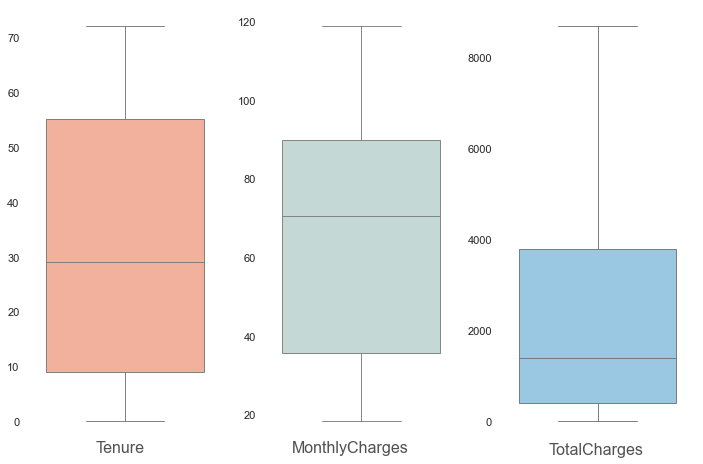

In [14]:
#Criando a figura
fig, ax = plt.subplots( ncols=3, figsize=(12, 8))

#Retirando as Spines
sns.despine(top=True, right=True, left=True,bottom=True)

#Criando e configurando o primeiro boxplot
box1=sns.boxplot(y=df_clean.tenure,  ax=ax[0], linewidth=.9, color='#ffaa8f')
box1.text(-0.15, -5.5, 'Tenure', fontsize=16, color=cinza_texto)
box1.set(ylabel=None)

#Criando e configurando o segundo boxplot
box2=sns.boxplot(y=df_clean.MonthlyCharges,  ax=ax[1], linewidth=.9, color='#c0ddd7')
box2.text(-0.35, 10.5, 'MonthlyCharges', fontsize=16, color=cinza_texto)
box2.set(ylabel=None)

#Criando e configurando o terceiro boxplot
box3=sns.boxplot(y=df_clean.TotalCharges,  ax=ax[2], linewidth=.9, color='#8ecaee')
box2.text(0.95, 10, 'TotalCharges', fontsize=16, color=cinza_texto)
box3.set(ylabel=None)

#Exibindo
plt.show()

Utilizando os método `describe` já notamos que o dataframe não aparenta possuir outliers: os quartis estão bem distribuidos, os valores de média e mediana estão dentro do esperado e o desvio padrão está condizente com o restante dos dados.

Ao plotarmos os boxplots podemos visualizar claramente que no dataframe está livre de outliers, de modo que podemos passar para a próxima etapa na análise onde verificaremos o balanceamento da variável alvo `Churn`.

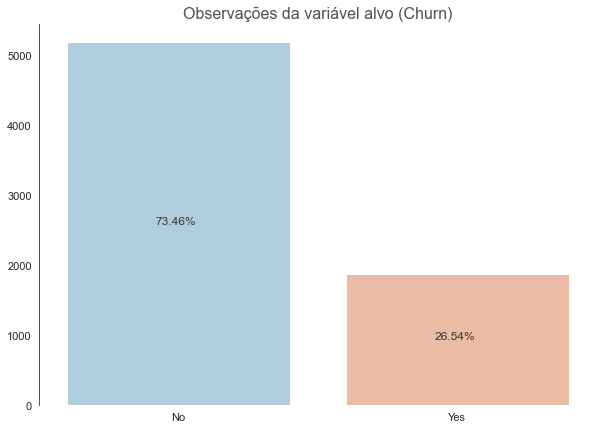

In [15]:
#Criando a figura
fig, ax = plt.subplots(figsize=(10, 7))

#Retirando as Spines
sns.despine(top=True, right=True, bottom=True)

#Plotando
sns.countplot(x=df_clean.Churn, palette='RdBu_r')

#Configurando o plot
ax.set_title('Observações da variável alvo (Churn)',
             fontsize=16,
             color=cinza_texto)
ax.set(xlabel=None)
ax.set(ylabel=None)


#Inserindo a porcentagem de cada observação dentro do plot
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()/df_clean.shape[0]*100), (p.get_x()+0.32, p.get_height()/2), color='#363636', fontsize=12)

#Exibindo
plt.show()

Percebemos que a variável está desbalanceada, a porcentagem de observações `no` para a variável `Churn` é de 73.46%, muito superior aos 26.54% da observação `yes`. Isso é algo que deverá ser tratado em etapas posteriores, já que manter uma variável desbalanceada dessa forma e utiliza-la em um modelo nos trará uma grande quantidade de falsos-negativos.

Continuando com nossa análise, vejamos agora a porcentagem de `Churn` que cada uma das variáveis do dataset possui, faremos isso plotando alguns gráficos de barra empilhadas (`Stacked Barplot`) confrontando os diferentes valores únicos de cada variável com a variável alvo.

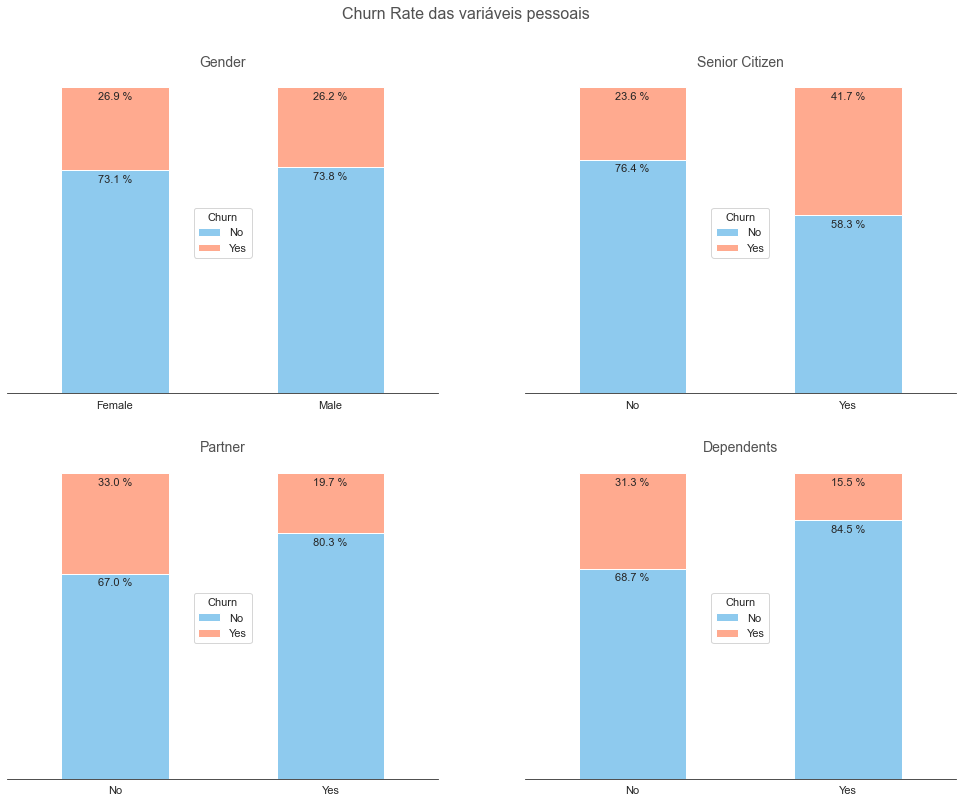

In [16]:
#Criando as crosstabs para os plots
df_gender = pd.crosstab(index = df_clean.gender,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_senior = pd.crosstab(index = df_clean.SeniorCitizen,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_partner = pd.crosstab(index = df_clean.Partner,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_dependents = pd.crosstab(index = df_clean.Dependents,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

#Criando a figura
fig, ax = plt.subplots(figsize=(17, 13), ncols=2, nrows=2)
st = fig.suptitle("Churn Rate das variáveis pessoais", 
                  fontsize="16",
                  color=cinza_texto,
                  y=.95)

#Plotando
ax1=df_gender.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][0])

ax2=df_senior.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][1])

ax3=df_partner.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][0])

ax4=df_dependents.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][1])

#Removendo as spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

#Configurando o plot
ax1.set_title("Gender", 
              fontsize=14, 
              color=cinza_texto)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_yticklabels([])
ax1.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax1.tick_params(rotation='auto')

ax2.set_title("Senior Citizen", 
              fontsize=14, 
              color=cinza_texto)
ax2.set_xticklabels(['No','Yes'])
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_yticklabels([])
ax2.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax2.tick_params(rotation='auto')

ax3.set_title("Partner", 
              fontsize=14,
              color=cinza_texto)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticklabels([])
ax3.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax3.tick_params(rotation='auto')

ax4.set_title("Dependents", 
              fontsize=14,
              color=cinza_texto)
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_yticklabels([])
ax4.legend(['No','Yes'],
           loc="center",
           title="Churn")
ax4.tick_params(rotation='auto')

#Inserindo a porcentagem de cada observação dentro do plot
for p in ax1.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax1.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax2.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax2.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)
   
for p in ax3.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax3.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax4.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax4.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)       

#Exibindo
plt.show()

Iniciando com as variáveis que contém dados pessoais de cada cliente (`Gender`,`SeniorCitizen`,`Partner` e `Dependents`) podemos retirar algumas informações importantes:

 - Não existe diferença significativa na quantidade de contratos cancelados entre homens e mulheres, o *churn rate* fica em aproximadamente **26%** para ambos os gêneros;
 - Idosos possuem uma taxa de *churn* significativmente maior em relação às pessoas mais jovens (quase o dobro);
 - Clientes que possuem parceiros e/ou dependentes cancelam menos contratos em comparação a clientes que não possuem. No caso da variável `Dependents` a taxa para clientes **com dependentes** é a metade da taxa para clientes **sem dependentes**.

 Continuando, vamos comparar as variáveis que possuem características técnicas de cada serviço contratado (`MultipleLines`,`InternetService`,`OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport`,`StreamingTV` e `StreamingMovies`)

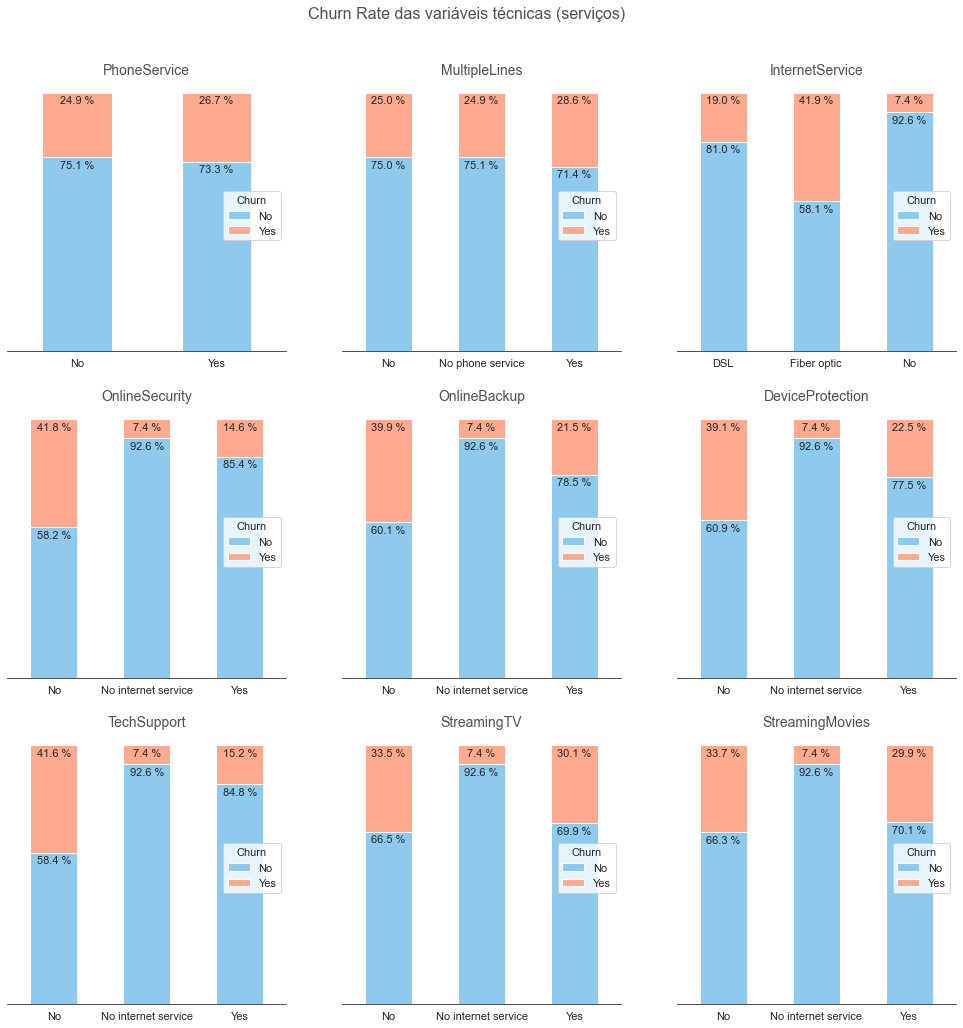

In [17]:
#Criando as crosstabs para os plots
df_phone = pd.crosstab(index = df_clean.PhoneService,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_lines = pd.crosstab(index = df_clean.MultipleLines,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_internet = pd.crosstab(index = df_clean.InternetService,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_security = pd.crosstab(index = df_clean.OnlineSecurity,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_backup = pd.crosstab(index = df_clean.OnlineBackup,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_device = pd.crosstab(index = df_clean.DeviceProtection,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_support = pd.crosstab(index = df_clean.TechSupport,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_tv = pd.crosstab(index = df_clean.StreamingTV,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_movies = pd.crosstab(index = df_clean.StreamingMovies,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

#Criando a figura
fig, ax = plt.subplots(figsize=(17, 17), ncols=3, nrows=3)
st = fig.suptitle("Churn Rate das variáveis técnicas (serviços)", 
                  fontsize="16", 
                  color=cinza_texto, 
                  y=.94)

#Plotando
ax1=df_phone.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][0])

ax2=df_lines.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][1])

ax3=df_internet.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0][2])

ax4=df_security.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][0])

ax5=df_backup.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][1])

ax6=df_device.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1][2])

ax7=df_support.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[2][0])

ax8=df_tv.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[2][1])

ax9=df_movies.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[2][2])

#Removendo as spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_visible(False)

ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['left'].set_visible(False)

ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.spines['left'].set_visible(False)

ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
ax8.spines['left'].set_visible(False)

ax9.spines['top'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.spines['left'].set_visible(False)

#Configurando o plot
ax1.set_title("PhoneService", 
              fontsize=14, 
              color=cinza_texto)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_yticklabels([])
ax1.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax1.tick_params(rotation='auto')

ax2.set_title("MultipleLines", 
              fontsize=14, 
              color=cinza_texto)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_yticklabels([])
ax2.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax2.tick_params(rotation='auto')

ax3.set_title("InternetService", 
              fontsize=14, 
              color=cinza_texto)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticklabels([])
ax3.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax3.tick_params(rotation='auto')

ax4.set_title("OnlineSecurity", 
              fontsize=14,
              color=cinza_texto)
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_yticklabels([])
ax4.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax4.tick_params(rotation='auto')

ax5.set_title("OnlineBackup", 
              fontsize=14,
              color=cinza_texto)
ax5.set_xlabel(None)
ax5.set_ylabel(None)
ax5.set_yticklabels([])
ax5.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax5.tick_params(rotation='auto')

ax6.set_title("DeviceProtection", 
              fontsize=14, 
              color=cinza_texto)
ax6.set_xlabel(None)
ax6.set_ylabel(None)
ax6.set_yticklabels([])
ax6.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax6.tick_params(rotation='auto')

ax7.set_title("TechSupport", 
              fontsize=14, 
              color=cinza_texto)
ax7.set_xlabel(None)
ax7.set_ylabel(None)
ax7.set_yticklabels([])
ax7.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax7.tick_params(rotation='auto')

ax8.set_title("StreamingTV", 
              fontsize=14,
              color=cinza_texto)
ax8.set_xlabel(None)
ax8.set_ylabel(None)
ax8.set_yticklabels([])
ax8.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax8.tick_params(rotation='auto')

ax9.set_title("StreamingMovies", 
              fontsize=14,
              color=cinza_texto)
ax9.set_xlabel(None)
ax9.set_ylabel(None)
ax9.set_yticklabels([])
ax9.legend(['No','Yes'],
           loc="center right",
           title="Churn")
ax9.tick_params(rotation='auto')

#Inserindo a porcentagem de cada observação dentro do plot
for p in ax1.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax1.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax2.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax2.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)
   
for p in ax3.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax3.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax4.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax4.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)  

for p in ax5.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax5.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax6.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax6.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)
   
for p in ax7.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax7.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax8.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax8.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)  

for p in ax9.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax9.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)                             

#Exibindo
plt.show()



Podemos ter mais algumas observações interessantes ao avaliarmos as variáveis técnicas:

- As variáveis `PhoneService`  e `MultipleLines`, ambas tratando-se de serviços telefônicos, também não possuem uma diferenças significativa na quantidade de contratos cancelados;

- Clientes que **não** possuem serviços de internet contratados tem uma baixa taixa de *churn*, apenas **7.4%**;

- Em contrapartida, clientes que possuem fibra ótica contratada possuem uma taixa muito alta de cancelamento, próximo aos **42%**.

- Clientes que possuem serviço de internet sem serviços adicionais de proteção e suporte (`OnlineSecurity`,`OnlineBackup`,`DeviceProtection` e `TechSupport`) tendem a ter uma taixa maior de cancelamento;

- Por outro lado, clientes que contratam esses serviços adicionais de proteção e suporte, principalmente os serviços de segurança online (`OnlineSecurity`) e suporte técnico (`TechSupport`), acabam por ter um *churn rate* menor;

- Serviços de *streaming* (`StreamingTV` e `StreamingMovies`) não apaentam impactar tanto na quantidade de contratos cancelados, já que essas variáveis possuem uma taxa de *churn* próximas tanto para clientes com ou sem esses serviços contratados.

Ficamos agora com 6 variáveis que tratam de dados referentes ao contrato e aos pagamentos realizados pelos serviços contratados, porém essas variáveis possuem tanto dados categóricos (`Contract`, `PaperlessBilling` e `PaymentMethod`) quanto numéricos (`tenure`, `MonthlyCharges` e `TotalCharges`), de modo que as análises serão divididas.

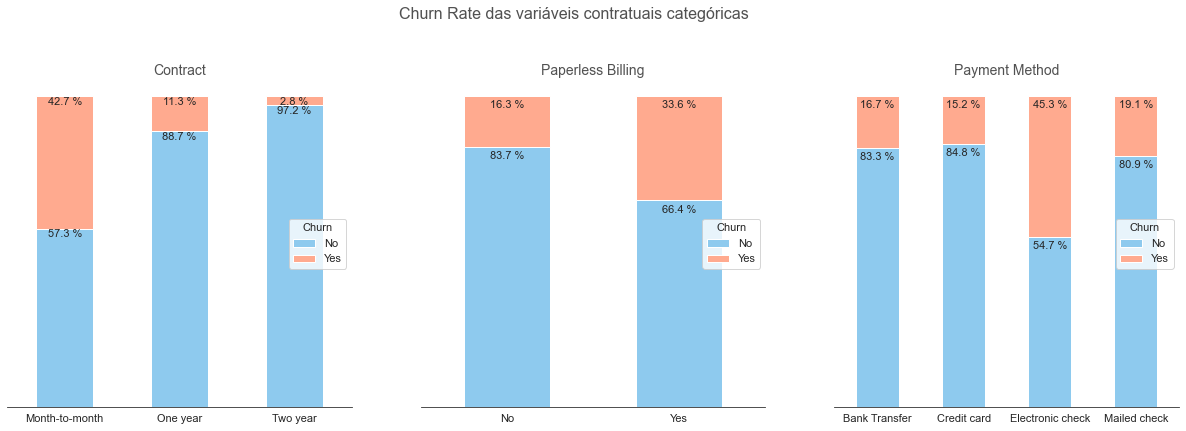

In [18]:
#Criando as crosstabs para os plots
df_contract = pd.crosstab(index = df_clean.Contract,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_billing = pd.crosstab(index = df_clean.PaperlessBilling,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

df_payment = pd.crosstab(index = df_clean.PaymentMethod,
                        columns = df_clean.Churn).apply(lambda x: x/x.sum()*100, axis=1)

#Criando a figura
fig, ax = plt.subplots(figsize=(21, 6), ncols=3, nrows=1)
st = fig.suptitle("Churn Rate das variáveis contratuais categóricas", 
                  fontsize="16", 
                  color=cinza_texto,
                  y=1.05)

#Plotando
ax1=df_contract.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[0])

ax2=df_billing.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[1])

ax3=df_payment.plot(kind='bar',
                    stacked=True,
                    color=['#8ecaee','#ffaa8f'],
                    ax=ax[2])


#Removendo as spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

#Configurando o plot
ax1.set_title("Contract", 
              fontsize=14, 
              color=cinza_texto)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_yticklabels([])
ax1.legend(['No','Yes'],
           loc="center right",
           title='Churn')
ax1.tick_params(rotation='auto')

ax2.set_title("Paperless Billing", 
              fontsize=14, 
              color=cinza_texto)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_yticklabels([])
ax2.legend(['No','Yes'],
           loc="center right",
           title='Churn')
ax2.tick_params(rotation='auto')

ax3.set_title("Payment Method", 
              fontsize=14,
              color=cinza_texto)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticklabels([])
ax3.legend(['No','Yes'],
           loc="center right",
           title='Churn')
ax3.tick_params(rotation='auto')

#Inserindo a porcentagem de cada observação dentro do plot
for p in ax1.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax1.text(x+width/2, 
            y+height-1.8, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

for p in ax2.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax2.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)
   
for p in ax3.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax3.text(x+width/2, 
            y+height-3, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=11)

  
#Exibindo
plt.show()


Iniciando com a análise das variáveis contratuais categóricas podemos perceber que:

- Clientes que realizam pagamentos mês a mês possuem uma taxa de *churn* bastante alta, enquanto clientes que possuem contratos fixos por um período de 2 anos têm uma fidelidade maior;

- Cobranças enviadas eletronicamente (`Paperless Billing`) têm um *churn rate* cerca de **17% maior**;

- Clientes que pagam via cheque eletrônico (`Eletronic check`) possuem uma taxa de cancelamento muito alta em comparação com clientes que pagam uilizando outros meios (**Cheque por correios**, **transferência bancária** ou **cartão de crédito**).

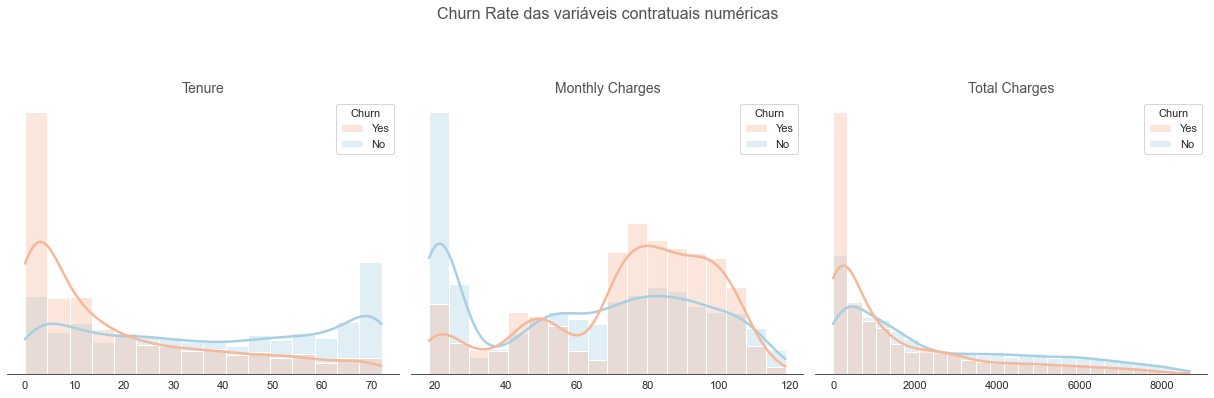

In [19]:
#Criando a figura
fig, ax = plt.subplots(ncols=3, figsize=(17, 5))
st = fig.suptitle("Churn Rate das variáveis contratuais numéricas",
                  fontsize="16",
                  color=cinza_texto, 
                  y=1.1)

#Plotando
sns.histplot(data=df_clean, 
             x="tenure", 
             hue="Churn", 
             hue_order=["Yes","No"], 
             ax=ax[0], 
             palette="RdBu",
             kde=True, 
             stat="density", 
             multiple="layer", 
             common_norm=False,
             alpha=.35, 
             line_kws={'linewidth':2.5})

sns.histplot(data=df_clean, 
             x="MonthlyCharges",
             hue="Churn", 
             hue_order=["Yes","No"], 
             ax=ax[1], 
             palette="RdBu",
             kde=True, 
             stat="density",
             multiple="layer", 
             common_norm=False,
             alpha=.35,
             line_kws={'linewidth':2.5})

sns.histplot(data=df_clean, 
             x="TotalCharges", 
             hue="Churn", 
             hue_order=["Yes","No"],
             ax=ax[2],
             palette="RdBu",
             kde=True, 
             stat="density", 
             multiple="layer", 
             common_norm=False,
             alpha=.35, 
             line_kws={'linewidth':2.5})

#Removendo as spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)  

#Configurando o plot
ax[0].set_title("Tenure", 
              fontsize=14, 
              color=cinza_texto)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_yticklabels([])
ax[0].tick_params(rotation='auto')

ax[1].set_title("Monthly Charges", 
              fontsize=14, 
              color=cinza_texto)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_yticklabels([])
ax[1].tick_params(rotation='auto')

ax[2].set_title("Total Charges", 
              fontsize=14,
              color=cinza_texto)
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].set_yticklabels([])
ax[2].tick_params(rotation='auto')
   

#Exibindo
plt.tight_layout()

A análise das variáveis contratuais numéricas foi feita de uma maneira um pouco diferente: utilizando um histograma com a porcentagem das observações `Yes` e `No` da variável alvo `Churn` em relação aos valores numéricos diferentes que cada variável contratual numérica (`tenure`, `MonthlyCharges` e `TotalCharges`) pode assumir.

Como resultado, podemos perceber o seguinte:

- Clientes recentes, com até 20 meses de contrato, possuem uma alta taxa de cancelamento. Com atenção especial para os clientes que assinaram contrato a menos de 5 meses. Esse cenário se reverte quando o tempo de contrato é superior a 30 meses, com uma tendência de aumento de fidelidade quanto maior o tempo de contrato.

- Existe uma zona com um alto *churn rate* para clientes que possuem fatura entre 75 e 105 dólares mensais. Essa tendência se reverte em faturas com valores entre 20 e 25 dólares, entre 55 e 65 dólares e entre 110 e 120 dólares mensais. 

Com isso terminamos as análises de nossas variáveis e conseguimos retirar informaçõs muito úteis que nos auxiliarão na construção do modelo e nos ajudaram a entender melhor os dados que estamos lidando. 

Para fechar, vamos plotar uma **matriz de correlação** de todo o dataset para que tenhamos uma visualização completa da correlação de todas as variáveis. Como o dataset possui variáveis categóricas o método `corr()` da biblioteca `pandas` não nos ajudará, visto que esse método apenas calcula a correlação entre variávis numéricas ( o que é mais comum de ocorrer). Utilizaremos então o módulo `associations` da biblioteca [Dython](http://shakedzy.xyz/dython/), que possui um conjunto de ferramentas para análise de dados que permite retirar ainda mais insights do dataset que estamos trabalhando. Dython automaticamente descobre quais variáveis são categoricas e quais são numéricas, calcula uma medida relevante de associação entre cada variável e plota tudo como um heatmap. Um breve tutorial sobre o módulo pode ser encontrado [nesse artigo no Medium.](https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26)

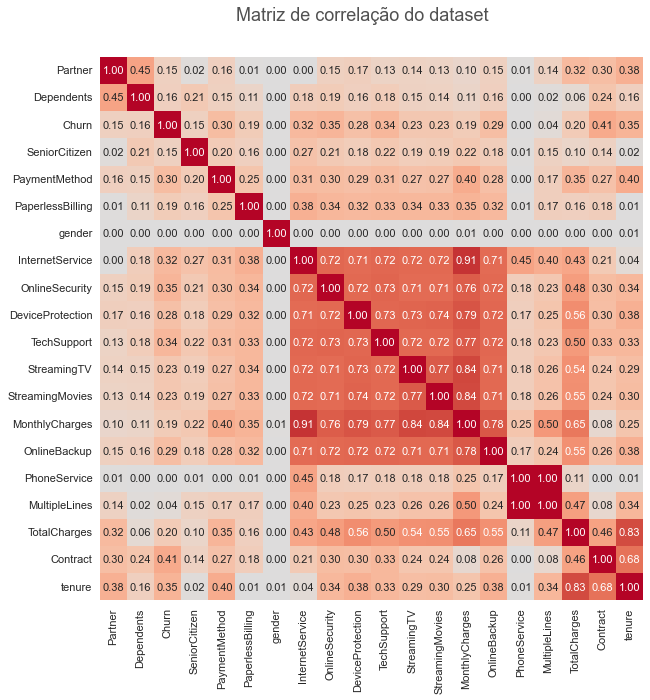

In [20]:
#Instalando a biblioteca e importando o módulo 
try:
    from dython.nominal import associations
except ImportError as e:
    %pip install dython
    from dython.nominal import associations

#Criando a figura
fig, ax = plt.subplots(figsize=(10,10))
st = fig.suptitle("Matriz de correlação do dataset", 
                  fontsize="18", 
                  color=cinza_texto,
                  y=.95)

#Plotando
corr = associations(df_clean, 
                    ax=ax, 
                    clustering=True, 
                    cmap='coolwarm', 
                    cbar=False)

#Exibindo
plt.show()

Através da matriz de correlação podemos reforçar alguns insights adquiridos anteriormente e adiquirir novos, por exemplo:

- As variáveis técnicas possuem uma alta correlação entre si;
- As variáveis `tenure` e `TotalCharges` estão altamente correlacionadas;
- A variável `MonhtlyCharges` possui uma alta correlação com as variáveis técnicas, como era de se esperar;
- As **maiores** correlações da variável alvo `Churn` são com as variáveis `Contract`, `tenure`, `OnlineSecurity` e `TechSupport`.
- As **menores** correlações da variável alvo `Churn` são com as variáveis `gender`, `PhoneService` e `MultipleLines`.

Porém, podemos perceber que a variável `gender` não possui correlação com nenhuma outra variável. Isso pode ser um indicativo que essa variável não precise ser utilizada no modelo que iremos construir. Para analisar mais afundo essa questão e descobrir quais outras variáveis podem ser excluídas na construção do modelo iremos cálcular a **Mutual Information (MI)** das variáveis, que é uma métrica que nos permite calcular o relacionamento, ou associações, entre uma feature e a variável alvo, assim como fazemos quando verificamos a **correlação** entre variáveis. A vantagem em utilizar a **Mutual Information** está no fato de esta conseguir medir *qualquer* tipo de relacionamnto entre as variáveis, enquanto a correlação mede apenas relações lineares.

A **MI** descreve as relações em termos de incerteza. A **Mutual Information** entre duas features é uma medida da extensão em que o conhecimento de uma feature reduz a incerteza sobre a outra. 



> "*Se você soubesse o valor de uma variável, quanto mais confiante você estaria sobre a variável alvo?*"




A biblioteca scikitlearn possui dois módulos para calcular a Mutual Information: 

- `mutual_info_regressor`, para variáveis alvo **contínuas**;
- `mutual_info_classif`, para variáveis alvo **discretas**.

Como nossa variável alvo (`Churn`) é discreta, utilizaremos então o módulo `mutual_info_classif`. Um tutorial detalhado de como calcular a **MI** utilizando o *scikitlearn* pode ser encontrado nesse [link do Kaggle](https://www.kaggle.com/code/ryanholbrook/mutual-information/tutorial)

In [21]:
#Importar o módulo mutual_information_classif e o LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

#Separar a feature matrix do target vector
X = df_clean.copy()
y = X.pop("Churn")

#Label encoding das variáveis categoricas (incluindo a variável alvo)
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

le = LabelEncoder()
y = le.fit_transform(y)    

#Todas as variáveis discretas precisam ser do tipo integer
discrete_features = X.dtypes == int

#Função para calcular a MI
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

#Exibindo
print("Multual information: matriz de features versus variável alvo")
print("------------------------------------------------------------")
print(mi_scores[::])  
print("------------------------------------------------------------")

Multual information: matriz de features versus variável alvo
------------------------------------------------------------
Contract            0.095167
tenure              0.073509
OnlineSecurity      0.066327
TechSupport         0.061675
OnlineBackup        0.056377
InternetService     0.050605
MonthlyCharges      0.045490
DeviceProtection    0.044063
TotalCharges        0.043605
PaymentMethod       0.041786
StreamingMovies     0.036466
StreamingTV         0.034960
PaperlessBilling    0.013697
Dependents          0.010532
Partner             0.005732
PhoneService        0.005432
MultipleLines       0.004614
SeniorCitizen       0.002492
gender              0.001898
Name: MI Scores, dtype: float64
------------------------------------------------------------



O valor mais baixo possível para a **Mutual Information** é *0.0*. Quando a **MI** é zero, as variáveis são indenpendentes, isto é, uma variável não pode dizer nada sobre a outra.

Em nosso caso estamos interessados na **MI** entre as variáveis da *feature matrix* e a variável alvo. Acima podemos ver o resultado do cálculo da métrica: quanto maior o valor, mais informação a variável possui e mais útil ela é para o modelo de machine learning. Por outro lado, valores muito baixos indicam variáveis pouco úteis para o modelo e que, muito provavelmente, não trarão prejuízo caso sejam excluídas do dataset.


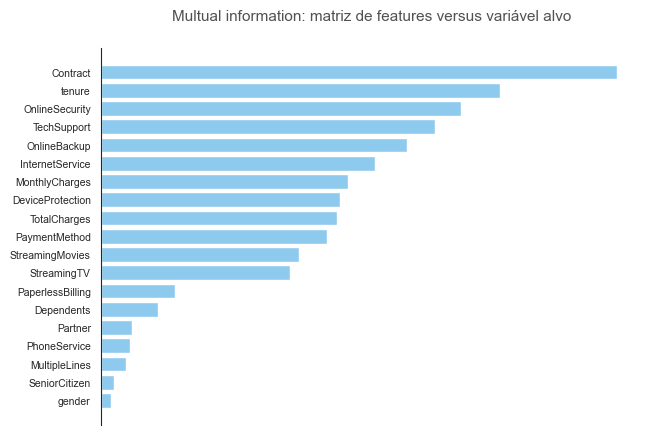

In [22]:
#Criando a função para plotar o gráfico da MI
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, 
             scores, 
             color='#8ecaee')
    plt.yticks(width, 
               ticks, 
               fontsize=7.5)
    plt.title("Multual information: matriz de features versus variável alvo",
              fontsize="11",
              color=cinza_texto,
              y=1.05)

#Criando a figura
fig = plt.figure(dpi=100,figsize=(7, 5))

#Configurando o plot e removendo as spines
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticklabels([])

#Exibindo
plot_mi_scores(mi_scores)

O plot acima nos dá uma visualização gráfica da **Mutual Information**. Através dele podemos perceber, ainda melhor, que as variáveis `MultipleLines`, `PhoneService` e `gender` possuem valores de **MI** próximos a zero, isso significa que essas variáveis não possuem informações relevantes na predição da variável alvo, possuindo um relacionamento baixo com ela, reforçando os insights que já tinhamos anteriormente relacionados a essas variáveis. Devido a isso, nas próximas etapas iremos excluí-las de nosso dataset. 

## Preparação dos dados

Terminada a análise passaremos agora para a etapa de preparação dos dados, onde utilizaremos as informações que adquirimos para modificar os dados de modo que sejam melhor utilizados no modelo que iremos construir.

Nessa etapa realizaremos o balanceamento da variável alvo, a normalização dos dados, o Label encoding das variáveis, realizaremos a Feature Engineering e dividiremos os dados em treino e teste de modo a serem utilizados na etapa de construção do modelo de machine learning.

Primeiramente iremos excluir as variáveis `MultipleLines`, `PhoneService` e `gender`, já que possuem valores de **MI** próximos a zero e não serão úteis para nosso modelo na previsão de Churn

In [23]:
#Importando as bibliotecas para realizar a preparação dos dados
try:
    from imblearn.under_sampling import RandomUnderSampler
except ImportError as e:
    %pip install imblearn --user
    from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
#from imblearn.under_sampling import RandomUnderSampler

#Copiando o dataset para manter as informações retiradas até aqui
df_prep = df_clean.copy()
df_prep.drop(["MultipleLines", "PhoneService", "gender"], axis=1, inplace=True)

#Verificando
print("Número de colunas antes da exclusão: ",len(df_clean.columns))
print("Número de colunas após a exclusão: ",len(df_prep.columns))
print("Número inicial de colunas: ",len(df.columns))

Número de colunas antes da exclusão:  20
Número de colunas após a exclusão:  17
Número inicial de colunas:  21


Até agora já excluímos 4 features do nosso dataset que não traziam informações relevantes para o nosso problema: `customerID`, `MultipleLines`, `PhoneService` e `gender`. Das 21 colunas do dataset original, restaram 17 que serão utilizadas pelo modelo.

Agora vamos realizar o enconding das variáveis. Para isso precisamos verificar os valores únicos e os tipos de cada variável a fim de tratarmos cada ocorrência da melhor forma possível

Em nosso dataset podemos ter 4 casos diferentes:

- **Valores únicos: `[2]` e Tipo: `[object]`:** 
  - *Variáveis binárias* (Ex: **Churn** [`Yes`, `No`]);
- **Valores únicos: `[>2]` e Tipo: `[object]`:**
  - *Variáveis categóricas* (Ex: **InternetServices** [`DSL`, `Fiber optic` ou `No`]);
- **Valores únicos: `[2]` e Tipo: `[int64 ou float64]`:**
  - *Variáveis numéricas prontas, não precisam passar pelo encoding;*
- **Valores únicos: `[>2]` e Tipo: `[int64 ou float64]`:**
  - *Variáveis numéricas que não passarão pelo encoding, mas precisarão de normalização.*




In [24]:
#Criando uma lista com o nome das colunas que contém cada tipo de dado e armazenando em uma variável
bin_var = df_prep.dtypes.loc[(df_prep.nunique() == 2) & (df_prep.dtypes == "object")].keys().to_list()
cat_var = df_prep.dtypes.loc[(df_prep.nunique() > 2) & (df_prep.dtypes == "object")].keys().to_list()
num_var = df_prep.dtypes.loc[(df_prep.nunique() == 2) & ((df_prep.dtypes == "int64") | (df_prep.dtypes == "float64"))].keys().to_list()
norm_var = df_prep.nunique().loc[(df_prep.nunique() > 2) & ((df_prep.dtypes == "int64") | (df_prep.dtypes == "float64"))].keys().to_list()

#Exibindo as colunas armazenadas
print("============Divisão das variáveis============\n")
print("-----Variáveis binárias:\n ", bin_var)
print("\n-----Variáveis categóricas:\n ", cat_var)
print("\n-----Variáveis numéricas prontas:\n ", num_var)
print("\n-----Variáveis que necessitam de normalização:\n ", norm_var)
print("\n================================================")

============Divisão das variáveis============

-----Variáveis binárias:
  ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']

-----Variáveis categóricas:
  ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

-----Variáveis numéricas prontas:
  ['SeniorCitizen']

-----Variáveis que necessitam de normalização:
  ['tenure', 'MonthlyCharges', 'TotalCharges']




Cada um desses casos será tratado de maneira diferente:

- As **Variáveis binárias** passarão pelo `LabelEncoder`;
- As **Variáveis categóricas** passarão pelo `One Hot Encoder`, através do método `get_dummies` do pandas;
- A variável `SeniorCitizen` já está pronta e não necessita de tratamento;
- As demais variáveis numéricas passarão pelo processo de *normalização* posteriormente.

In [25]:
#LabelEncoding das variáveis categóricas
df_prep = pd.get_dummies(df_prep, columns=cat_var)

#OneHotEncoder das variáveis binárias
le = LabelEncoder()
for i in bin_var:
  df_prep[i] = le.fit_transform(df_prep[i])

#Verificando o dataset após o encoding
df_prep.head()


,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank Transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,0,1,...,1,0,0,1,0,0,0,0,1,0


Após o processo de *encoding* o dataset passou a ter 36 colunas, isso se deve ao **OneHotEncoder** realizado pelo método `get_dummies`. Durante esse processo cada valor assumido por determinada coluna é separado em uma nova coluna que conterá o nome original + o nome do valor assumido. A linha onde ocorre a observação em questão conterá 1 e as demais conterão 0, por exemplo:

A coluna **InternetServices** pode conter os seguintes valores: `DSL`, `Fiber optic` ou `No`. Durante o processo de **OneHotEncoder** 3 novas colunas serão criadas (`InternetServices_DSL`, `InternetServices_Fiber Optic` e `InternetServices_No`) e a coluna original será excluída. As novas colunas conterão o valor **1** nas linhas em que o valor original ocorria (`_DSL`, `_Fiber optic` ou `_No`) e **0** nas demais. 

Logo, o aumento na quantidade de colunas é normal e esperado devido ao processo realizado.

Agora que realizamos o *encoding* das variáveis, iremos realizar a normalização e balanceamento das variáveis. Conforme vimos inicialmente, a variável alvo `Churn` está desbalanceada, com a maior parte das observações sendo `No`. Se criarmos e treinarmos o modelo com os dados dessa maneira teremos uma grande quantidade de falso-negativos. 

Já com as variáveis numéricas `tenure`, `MonthlyCharges` e `TotalCharges`podemos perceber que seus valores estão e escala de grandeza diferentes. Se deixarmos os dados dessa forma podemos influenciar o modelo a dar maior peso para uma variável que contém um valor absoluto maior, mas que não necessariamente possui maior relevância para a predição.

Porém, como boa prática recomendada, devemos primeiro dividir os dados entre treino e teste para, só então, realizarmos a normalização e o balanceamento dos dados de **treino** (os dados de testes devem parmanecer intocados até o momento da avaliação do modelo)

O que faremos agora, então, é:

- Dividir os dados entre treino e teste;
- Normalizar as variáveis numéricas `tenure`, `MonthlyCharges` e `TotalCharges`;
- Balancear a variável alvo `Churn`.

In [26]:
#Separar os dados entre feature matrix e target vector
X = df_prep.drop('Churn', axis=1)
y = df_prep.Churn

#Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

#Instanciar os modelos de normalização e balanceamento
MinMax = MinMaxScaler()
rus = RandomUnderSampler(random_state=seed)

#Normalizar as variáveis numéricas
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] =  MinMax.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

#Balancear os dados
X_train, y_train = rus.fit_resample(X_train, y_train)

#Verificando a normalização
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank Transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.888889,1,0.837811,0.766178,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,1,1,0.416667,0,0.678607,0.292240,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,0,1,1,0.986111,0,0.815423,0.830071,0,1,0,...,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0.750000,1,0.612935,0.496068,0,1,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,0.736111,0,0.013930,0.112611,0,0,1,...,0,1,0,0,0,1,1,0,0,0


Dentre as diversas ténicas de normalização disponíveis, uma das mais utilizadas é a Técnica Min-Max, que consiste em transformar os valores das variáveis em um range entre `[0,1]` utilizando os valores mínimo e máximo da variável para realizar essa transformação, que passarão a ser 0 e 1, respectivamente ([Fonte](https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79)). O cálculo utilizado para essa transformação é o seguinte:


\begin{align}
    {\large x_{norm} =\frac{x-min(x)}{max(x)-min(x)}} \qquad  
    {\scriptsize {Onde} \ x = \text{ feature, variável, vetor}}
\end{align}


Já para o balanceamento dos dados aplicamos a técnica de undersampling. De maneira resumida, essa técnica consiste em diminuir a quantidade de observações com a maior número de classificação de modo a equalizar. O portal [Data Hackers](https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9) possui um excelente artigo que explica as diversas formas de balanceamento de dados, incluindo a que foi utilizada aqui.

<center><image alt="Random Undersampling" width="35%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/ChurnPrediction/main/Images/rus.png"></center>

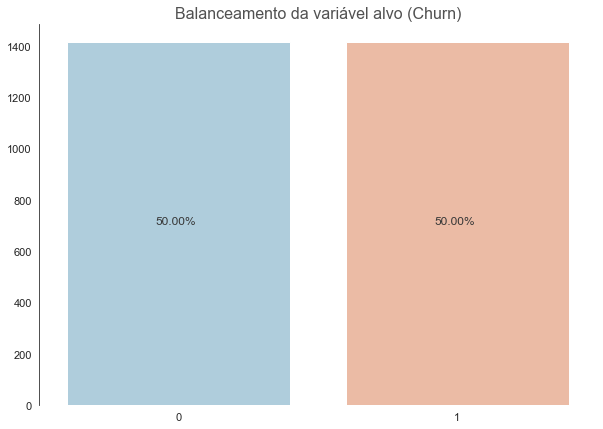

In [27]:
#Criando a figura
fig, ax = plt.subplots(figsize=(10, 7))

#Retirando as Spines
sns.despine(top=True, right=True, bottom=True)

#Plotando
sns.countplot(x=y_train, palette='RdBu_r')

#Configurando o plot
ax.set_title('Balanceamento da variável alvo (Churn)',
             fontsize=16,
             color=cinza_texto)
ax.set(xlabel=None)
ax.set(ylabel=None)


#Inserindo a porcentagem de cada observação dentro do plot
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()/y_train.shape[0]*100), (p.get_x()+0.32, p.get_height()/2), color='#363636', fontsize=12)

#Exibindo
plt.show()

## Construindo o modelo de machine learning


Um passo importante na construção de um modelo de machine learning é a construção de um modelo de base (*baseline*), que consiste em um algoritmo simples que será utilizado como comparativo de desempenho com os demais modelos de modo a escolhermos o que possuí a melhor taxa de acerto. Para isso, porém, precisamos escolher qual métrica será adotada como comparativo entre esses modelos. Algumas métricas utilizadas para avaliação de performance são:

- **Acurácia:** Acurácia é a métrica mais simples, ela representa o número de previsões corretas do modelo;
- **Precision:** Qual a proporção de acerto do modelo entre os **previstos** como positivo `[1]`.
- **Recall:** Qual a proporção de acerto do modelo entre os positivos `[1]` **reais**.
- **F1-Score:** É a média harmônica entre *precision* e *recall*. O melhor valor possível para o *F1-Score* é **1** e o pior é **0**.

Essas métricas são calculadas utilizando a **matriz de confusão** que é a matriz quadrada em que se compara os verdadeiros valores de uma classificação com os valores preditos através de algum modelo. Sua diagonal é composta pelos acertos do modelo e os demais valores são os erros cometidos. O caso binário, o mais comum, é representado pela seguinte matriz [Fonte](https://www.flai.com.br/juscudilio/qual-a-melhor-metrica-para-avaliar-os-modelos-de-machine-learning/):


A escolha da métrica a ser utilizada dependende do profissional de dados, do problema atacado e dos dados que estão sendo trabalhados. Neste estudo utilizaremos o `Recall` e o `F1-Score` como métricas para avaliação.

Como baseline utilizaremos um modelo simples de **Regressão Logística**, sem nenhuma mudança em seus hiperparâmetros e avaliaremos o seu desempenho utilizando o módulo `cross_val_score` do `sklearn`. Desse modo conseguimos testar o modelo deixando os dados de teste intactos, já que a técnica de *Cross Validation* separa uma parte dos **dados de treino** para serem utilizados como **dados de validação**.

In [28]:
#Importando as bibliotecas
try:
    from xgboost import XGBClassifier
except ImportError as e:
    %pip install xgboost --user
    from xgboost import XGBClassifier
    
try:
    from lightgbm import LGBMClassifier
except ImportError as e:
    %pip install lightgbm
    from lightgbm import LGBMClassifier

from sklearn.dummy import DummyClassifier    
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
#Instânciando o modelo sem nenhuma alteração nos hiperparâmetros
lr = LogisticRegression(random_state=seed)

#Avaliando o modelo através das métricas escolhidas e atribuindo o resultado
base_recall = cross_val_score(lr, 
                              X_train,
                              y_train,
                              scoring='recall')
base_f1 = cross_val_score(lr,
                          X_train,
                          y_train, 
                          scoring='f1')

#Exibindo
print("Resultado do modelo de baseline - Logistic Regression")
print("-----------------------------------------------------")
print("Recall: %0.6f (+/- %0.6f)" %(base_recall.mean(), base_recall.std()))
print("F1-Score: %0.6f (+/- %0.6f)" %(base_f1.mean(), base_f1.std()))
print("-----------------------------------------------------")

Resultado do modelo de baseline - Logistic Regression
-----------------------------------------------------
Recall: 0.800444 (+/- 0.014520)
F1-Score: 0.777660 (+/- 0.013401)
-----------------------------------------------------


Agora que já possuímos nosso *baseline* podemos compara-lo com outros modelos e verificar qual possui o melhor desempenho, em seguida podemos realizar o *tunning* em seus hiperparâmetros a fim de conseguirmos um desempenho ainda melhor.

In [30]:
#Instânciando os modelos sem nenhuma alteração nos hiperparâmetros
randomf = RandomForestClassifier(random_state=seed)
decisiont = DecisionTreeClassifier(random_state=seed)
sgdc = SGDClassifier(random_state=seed)
kneighbors = KNeighborsClassifier()
gboost = GradientBoostingClassifier(random_state=seed)
supportvc = SVC(random_state=seed)
xgboost = XGBClassifier(random_state=seed)
lgbm = LGBMClassifier(random_state=seed)

#Criando listas vazias para armazenamento dos valores
modelo = []
recall = []
f1 = []

#Criando um laço para avaliar os modelos
for model in (randomf, decisiont, sgdc, kneighbors, gboost, supportvc, xgboost, lgbm):
  modelo.append(model.__class__.__name__)
  recall.append((cross_val_score(model, X_train, y_train, scoring='recall')).mean())
  f1.append((cross_val_score(model, X_train, y_train, scoring='f1')).mean())

#Criando um dataframe com os valores obtidos
df_modelos = pd.DataFrame(data=recall, index=modelo, columns=['Recall'])
df_modelos['F1-Score'] = f1

#exibindo
df_modelos


,Recall,F1-Score
RandomForestClassifier,0.757973,0.757405
DecisionTreeClassifier,0.687888,0.692521
SGDClassifier,0.750164,0.738649
KNeighborsClassifier,0.782763,0.739600
GradientBoostingClassifier,0.796915,0.780598
SVC,0.799737,0.767187
XGBClassifier,0.756555,0.750293
LGBMClassifier,0.772142,0.758792


In [31]:
#Buscando os modelos com desempenho superior ao baseline
df_modelos.loc[(df_modelos.Recall > (base_recall.mean() - base_recall.std())) & (df_modelos['F1-Score'] > (base_f1.mean() - base_f1.std()))].sort_values(by='Recall', ascending=False)[:2]

,Recall,F1-Score
SVC,0.799737,0.767187
GradientBoostingClassifier,0.796915,0.780598


Dos modelos comparados, os dois primeiros com o melhor desempenho foram o **SVC** e o **XGBClassifier** (levando em consideração o desvio padrão do modelo de baseline). 

Para o *tunning* iremos utilizar duas técnicas e comparar o desempenho dos modelos em cada uma delas: 

 - **GridSearchCV** : Testamos uma lista de valores dos hiperparametros do modelo e escolhemos manualmente a melhor combinação baseado no melhor score. Toma bastante tempo (pois devemos tentar manualmente todas as combinações), mas nos dá os melhores parâmetros ([Fonte](https://www.kaggle.com/general/212697) - *Adaptado*).

 - **RandomizedSearchCV**: Testa aleatoriamente um range de valores para os hiperparametros (precisamos definir o nnúmero de iterações). Ótimo para testar um grande range de valores e normalmente encontra uma boa combinação rapidamente, porém não nos garante que as melhores combinações são fornecidas pois nem todos os valores dos hiperparametros são testados ([Fonte](https://www.kaggle.com/general/212697) - *Adaptado*).

In [32]:
'''
#criando variáveis para atribuição dos valores dos parâmetros do modelo XGBClassifier
n_estimators=range(0,1000,50)
max_depth=range(1,8,1)
min_child_weigh=range(1,5,1)
gamma=[i/10.0 for i in range(0,5)]
learning_rate=[0.001, 0.01, 0.1, 1]
'''

'\n#criando variáveis para atribuição dos valores dos parâmetros do modelo XGBClassifier\nn_estimators=range(0,1000,50)\nmax_depth=range(1,8,1)\nmin_child_weigh=range(1,5,1)\ngamma=[i/10.0 for i in range(0,5)]\nlearning_rate=[0.001, 0.01, 0.1, 1]\n'

In [33]:
'''
#Dicionário dos parâmetros que serão utilizados no grid search
grid_params = dict(
    n_estimators=n_estimators
)

#Instânciando o modelo
xgbc_grid = XGBClassifier(learning_rate=0.1, random_state=seed)

#Instânciando o modelo de Grid Search
grid = GridSearchCV(xgbc_grid, 
                    grid_params, 
                    scoring='recall')

#Fit do modelo nos dados de treino
grid.fit(X_train, y_train)

#Exibindo
print("GridSearchCV do algoritmo XGBClassifier - Iteração 1\n")
print("Melhores parâmetros: ", grid.best_params_)
print("Melhor Recall: ", grid.best_score_)
'''

'\n#Dicionário dos parâmetros que serão utilizados no grid search\ngrid_params = dict(\n    n_estimators=n_estimators\n)\n\n#Instânciando o modelo\nxgbc_grid = XGBClassifier(learning_rate=0.1, random_state=seed)\n\n#Instânciando o modelo de Grid Search\ngrid = GridSearchCV(xgbc_grid, \n                    grid_params, \n                    scoring=\'recall\')\n\n#Fit do modelo nos dados de treino\ngrid.fit(X_train, y_train)\n\n#Exibindo\nprint("GridSearchCV do algoritmo XGBClassifier - Iteração 1\n")\nprint("Melhores parâmetros: ", grid.best_params_)\nprint("Melhor Recall: ", grid.best_score_)\n'

In [34]:
"""
#Dicionário dos parâmetros que serão utilizados no grid search
grid_params = dict(
    max_depth=max_depth,
    min_child_weigh=min_child_weigh
)

#Instânciando o modelo
xgbc_grid = XGBClassifier(n_estimators=50, 
                       random_state=seed)

#Instânciando o modelo de Grid Search
grid = GridSearchCV(xgbc_grid, 
                    grid_params, 
                    scoring='recall')

#Fit do modelo nos dados de treino
grid.fit(X_train, y_train)

#Exibindo
print("GridSearchCV do algoritmo XGBClassifier - Iteração 2\n")
print("Melhores parâmetros: ", grid.best_params_)
print("Melhor Recall: ", grid.best_score_)
"""

'\n#Dicionário dos parâmetros que serão utilizados no grid search\ngrid_params = dict(\n    max_depth=max_depth,\n    min_child_weigh=min_child_weigh\n)\n\n#Instânciando o modelo\nxgbc_grid = XGBClassifier(n_estimators=50, \n                       random_state=seed)\n\n#Instânciando o modelo de Grid Search\ngrid = GridSearchCV(xgbc_grid, \n                    grid_params, \n                    scoring=\'recall\')\n\n#Fit do modelo nos dados de treino\ngrid.fit(X_train, y_train)\n\n#Exibindo\nprint("GridSearchCV do algoritmo XGBClassifier - Iteração 2\n")\nprint("Melhores parâmetros: ", grid.best_params_)\nprint("Melhor Recall: ", grid.best_score_)\n'

In [35]:
"""
#Dicionário dos parâmetros que serão utilizados no grid search
grid_params = dict(
    gamma=gamma
    )

#Instânciando o modelo
xgbc_grid = XGBClassifier(n_estimators=50,
                         max_depth=1,
                         min_child_weight=1,                      
                        random_state=seed)

#Instânciando o modelo de Grid Search
grid = GridSearchCV(xgbc_grid, 
                    grid_params, 
                    scoring='recall')

#Fit do modelo nos dados de treino
grid.fit(X_train, y_train)

#Exibindo
print("GridSearchCV do algoritmo XGBClassifier - Iteração 3\n")
print("Melhores parâmetros: ", grid.best_params_)
print("Melhor Recall: ", grid.best_score_)
"""

'\n#Dicionário dos parâmetros que serão utilizados no grid search\ngrid_params = dict(\n    gamma=gamma\n    )\n\n#Instânciando o modelo\nxgbc_grid = XGBClassifier(n_estimators=50,\n                         max_depth=1,\n                         min_child_weight=1,                      \n                        random_state=seed)\n\n#Instânciando o modelo de Grid Search\ngrid = GridSearchCV(xgbc_grid, \n                    grid_params, \n                    scoring=\'recall\')\n\n#Fit do modelo nos dados de treino\ngrid.fit(X_train, y_train)\n\n#Exibindo\nprint("GridSearchCV do algoritmo XGBClassifier - Iteração 3\n")\nprint("Melhores parâmetros: ", grid.best_params_)\nprint("Melhor Recall: ", grid.best_score_)\n'

In [36]:
"""
#Dicionário dos parâmetros que serão utilizados no grid search
grid_params = dict(
    learning_rate=learning_rate
    )

#Instânciando o modelo
xgbc_grid = XGBClassifier(n_estimators=50,
                         max_depth=1,
                         min_child_weight=1,
                          gamma=0.0,                      
                        random_state=seed)

#Instânciando o modelo de Grid Search
grid = GridSearchCV(xgbc_grid, 
                    grid_params, 
                    scoring='recall')

#Fit do modelo nos dados de treino
grid.fit(X_train, y_train)

#Exibindo
print("GridSearchCV do algoritmo XGBClassifier - Iteração 4\n")
print("Melhores parâmetros: ", grid.best_params_)
print("Melhor Recall: ", grid.best_score_)
"""

'\n#Dicionário dos parâmetros que serão utilizados no grid search\ngrid_params = dict(\n    learning_rate=learning_rate\n    )\n\n#Instânciando o modelo\nxgbc_grid = XGBClassifier(n_estimators=50,\n                         max_depth=1,\n                         min_child_weight=1,\n                          gamma=0.0,                      \n                        random_state=seed)\n\n#Instânciando o modelo de Grid Search\ngrid = GridSearchCV(xgbc_grid, \n                    grid_params, \n                    scoring=\'recall\')\n\n#Fit do modelo nos dados de treino\ngrid.fit(X_train, y_train)\n\n#Exibindo\nprint("GridSearchCV do algoritmo XGBClassifier - Iteração 4\n")\nprint("Melhores parâmetros: ", grid.best_params_)\nprint("Melhor Recall: ", grid.best_score_)\n'

In [37]:
"""
#Instânciando o modelo sem hiperparâmetros
xgbc_random = XGBClassifier(random_state=seed)

#Dicionário dos parâmetros que serão utilizados na Randomized Search
random_params = dict(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_child_weigh=min_child_weigh,
    gamma=gamma,
    learning_rate=learning_rate
) 

#Instânciando o modelo de Randomized Search 
random = RandomizedSearchCV(xgbc_random, 
                            random_params,
                            scoring='recall',
                            random_state=seed,
                            n_iter=300) 

#Fit do modelo nos dados de treino
random.fit(X_train, y_train) 

#Exibindo
print("RandomizedSearchCV do algoritmo XGBClassifier\n")
print('Melhores parâmetros: ', random.best_params_)
print('Melhor Recall: ', random.best_score_) 
"""

'\n#Instânciando o modelo sem hiperparâmetros\nxgbc_random = XGBClassifier(random_state=seed)\n\n#Dicionário dos parâmetros que serão utilizados na Randomized Search\nrandom_params = dict(\n    n_estimators=n_estimators,\n    max_depth=max_depth,\n    min_child_weigh=min_child_weigh,\n    gamma=gamma,\n    learning_rate=learning_rate\n) \n\n#Instânciando o modelo de Randomized Search \nrandom = RandomizedSearchCV(xgbc_random, \n                            random_params,\n                            scoring=\'recall\',\n                            random_state=seed,\n                            n_iter=300) \n\n#Fit do modelo nos dados de treino\nrandom.fit(X_train, y_train) \n\n#Exibindo\nprint("RandomizedSearchCV do algoritmo XGBClassifier\n")\nprint(\'Melhores parâmetros: \', random.best_params_)\nprint(\'Melhor Recall: \', random.best_score_) \n'

In [ ]:
#SGDClassifier(alpha= 0.0001, penalty= 'l2', loss= 'modified_huber', learning_rate= 'adaptive', eta0= 100, class_weight= {1: 0.6, 0: 0.4},  random_state=seed)
#Recall: 0.90 (+/- 0.02)
#F1-Score: 0.79 (+/- 0.02)

#SGDClassifier(alpha=0.001, penalty='elasticnet', loss='log', learning_rate='invscaling', eta0=1, class_weight={1: 0.7, 0: 0.3}, l1_ratio=0.0, random_state=seed)
#Recall: 0.94 (+/- 0.01)
#F1-Score: 0.78 (+/- 0.01)

In [61]:
#criando variáveis para atribuição dos valores dos parâmetros do modelo SVC
C=[1,10,100,1000]
gamma=[1, 0.1, 0.01, 0.001, 0.0001]
kernel =['linear','rbf']

In [62]:
#Dicionário dos parâmetros que serão utilizados no grid search
grid_params = dict(
    kernel=kernel
)

#Instânciando o modelo
svc_grid = SVC(random_state=seed)

#Instânciando o modelo de Grid Search
grid = GridSearchCV(svc_grid, 
                    grid_params, 
                    scoring='recall')

#Fit do modelo nos dados de treino
grid.fit(X_train, y_train)

#Exibindo
print("GridSearchCV do algoritmo SVC - Iteração 1\n")
print("Melhores parâmetros: ", grid.best_params_)
print("Melhor Recall: ", grid.best_score_)

GridSearchCV do algoritmo SVC - Iteração 1

Melhores parâmetros:  {'kernel': 'linear'}
Melhor Recall:  0.8337017266872164


In [63]:
#Dicionário dos parâmetros que serão utilizados no grid search
grid_params = dict(
    C=C
)

#Instânciando o modelo
svc_grid = SVC(kernel="linear", random_state=seed)

#Instânciando o modelo de Grid Search
grid = GridSearchCV(svc_grid, 
                    grid_params, 
                    scoring='recall')

#Fit do modelo nos dados de treino
grid.fit(X_train, y_train)

#Exibindo
print("GridSearchCV do algoritmo SVC - Iteração 2\n")
print("Melhores parâmetros: ", grid.best_params_)
print("Melhor Recall: ", grid.best_score_)

GridSearchCV do algoritmo SVC - Iteração 2

Melhores parâmetros:  {'C': 1}
Melhor Recall:  0.8337017266872164


In [64]:
#Dicionário dos parâmetros que serão utilizados no grid search
grid_params = dict(
    gamma=gamma
)

#Instânciando o modelo
svc_grid = SVC(kernel="linear", C=1, random_state=seed)

#Instânciando o modelo de Grid Search
grid = GridSearchCV(svc_grid, 
                    grid_params, 
                    scoring='recall')

#Fit do modelo nos dados de treino
grid.fit(X_train, y_train)

#Exibindo
print("GridSearchCV do algoritmo SVC - Iteração 3\n")
print("Melhores parâmetros: ", grid.best_params_)
print("Melhor Recall: ", grid.best_score_)

GridSearchCV do algoritmo SVC - Iteração 3

Melhores parâmetros:  {'gamma': 1}
Melhor Recall:  0.8337017266872164


In [59]:
#Dicionário dos parâmetros que serão utilizados no grid search
grid_params = {
    'C' : [0,2,4,6,8,10]
}

#Instânciando o modelo
svc_grid = SVC(kernel='linear', gamma=0.1, random_state=seed)

#Instânciando o modelo de Grid Search
grid = GridSearchCV(svc_grid, 
                    grid_params, 
                    scoring='recall')

#Fit do modelo nos dados de treino
grid.fit(X_train, y_train)

#Exibindo
print("GridSearchCV do algoritmo SVC - Iteração 4\n")
print("Melhores parâmetros: ", grid.best_params_)
print("Melhor Recall: ", grid.best_score_)

C:\Users\luis.guimaraes\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\luis.guimaraes\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\luis.guimaraes\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\luis.guimaraes\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(

GridSearchCV do algoritmo SVC - Iteração 4

Melhores parâmetros:  {'C': 2}
Melhor Recall:  0.8337017266872164


In [65]:
#Instânciando o modelo sem hiperparâmetros
svc_random = SVC(random_state=seed)

#Dicionário dos parâmetros que serão utilizados na Randomized Search
random_params = dict(
    C=C,
    gamma=gamma,
    kernel=kernel
) 

#Instânciando o modelo de Randomized Search 
random = RandomizedSearchCV(svc_random, 
                            random_params,
                            scoring='recall',
                            random_state=seed,
                            n_iter=300) 

#Fit do modelo nos dados de treino
random.fit(X_train, y_train) 

#Exibindo
print("RandomizedSearchCV do algoritmo XGBClassifier\n")
print('Melhores parâmetros: ', random.best_params_)
print('Melhor Recall: ', random.best_score_) 

C:\Users\luis.guimaraes\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 40 is smaller than n_iter=300. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [66]:
#Instânciando os modelos com os hiperparâmetros encontrados
xgbc_grid = XGBClassifier(n_estimators=50,
                          max_depth=1,
                          min_child_weight=1,
                          gamma=0.0,
                          learning_rate=0.001,                      
                          random_state=seed)

xgbc_random = XGBClassifier(n_estimators=850,
                          max_depth=1,
                          min_child_weight=4,
                          gamma=0.2,
                          learning_rate=0.001,                      
                          random_state=seed)

svc_grid = SVC(kernel="linear",
               gamma=1,
               C=1)

svc_random = SVC(kernel="linear",
               gamma=1,
               C=10)

#Avaliando o modelo através das métricas escolhidas e atribuindo o resultado
xgbc_grid_recall = cross_val_score(xgbc_grid,
                                X_train, 
                                y_train, 
                                scoring='recall')
xgbc_grid_f1 = cross_val_score(xgbc_grid, 
                            X_train, 
                            y_train, 
                            scoring='f1')

xgbc_random_recall = cross_val_score(xgbc_random,
                                X_train, 
                                y_train, 
                                scoring='recall')
xgbc_random_f1 = cross_val_score(xgbc_random, 
                            X_train, 
                            y_train, 
                            scoring='f1')

svc_grid_recall = cross_val_score(svc_grid,
                                X_train, 
                                y_train, 
                                scoring='recall')
svc_grid_f1 = cross_val_score(svc_grid, 
                            X_train, 
                            y_train, 
                            scoring='f1')

svc_random_recall = cross_val_score(svc_random,
                                X_train, 
                                y_train, 
                                scoring='recall')
svc_random_f1 = cross_val_score(svc_random, 
                            X_train, 
                            y_train, 
                            scoring='f1')


#Exibindo
print("=================== XGBClassifier ===================\n")
print("++ GridSearchCV ")
print("\nRecall: %0.6f (+/- %0.6f)" %(xgbc_grid_recall.mean(), xgbc_grid_recall.std()))
print("F1-Score: %0.6f (+/- %0.6f)" %(xgbc_grid_f1.mean(), xgbc_grid_f1.std()))
print("\n++ RandomizedSearchCV ")
print("\nRecall: %0.6f (+/- %0.6f)" %(xgbc_random_recall.mean(), xgbc_random_recall.std()))
print("F1-Score: %0.6f (+/- %0.6f)" %(xgbc_random_f1.mean(), xgbc_random_f1.std()))
print("\n=================== SVC ===================\n")
print("++ GridSearchCV ")
print("\nRecall: %0.6f (+/- %0.6f)" %(svc_grid_recall.mean(), svc_grid_recall.std()))
print("F1-Score: %0.6f (+/- %0.6f)" %(svc_grid_f1.mean(), svc_grid_f1.std()))
print("\n++ RandomizedSearchCV ")
print("\nRecall: %0.6f (+/- %0.6f)" %(svc_random_recall.mean(), svc_random_recall.std()))
print("F1-Score: %0.6f (+/- %0.6f)" %(svc_random_f1.mean(), svc_random_f1.std()))

=================== XGBClassifier ===================

++ GridSearchCV 

Recall: 0.890306 (+/- 0.013219)
F1-Score: 0.773976 (+/- 0.010806)

++ RandomizedSearchCV 

Recall: 0.890306 (+/- 0.013219)
F1-Score: 0.773976 (+/- 0.010806)

=================== SVC ===================

++ GridSearchCV 

Recall: 0.833702 (+/- 0.014508)
F1-Score: 0.769265 (+/- 0.012362)

++ RandomizedSearchCV 

Recall: 0.833702 (+/- 0.014508)
F1-Score: 0.769265 (+/- 0.012362)
